In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 50

In [2]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
numerical = df.select_dtypes(int)

In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [7]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [8]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


#### Which one are ordinals? 

In [10]:
categoricals.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [11]:
categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})

<ipython-input-11-e1d9039445fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})


In [12]:
categoricals.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [13]:
categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})

<ipython-input-13-b3e6e3c73703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})


In [14]:
categoricals.month.unique()

array(['feb', 'jan'], dtype=object)

In [15]:
categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})

<ipython-input-15-817c78909473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})


In [16]:
categoricals.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [17]:
categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })

<ipython-input-17-8b0165ea3450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })


In [18]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,1,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,1
1,west region,no,0,1,0,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,1
2,east,no,0,2,1,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,1
3,north west,yes,1,1,0,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,1
4,north west,no,2,2,0,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,0,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,1
10685,north west,no,0,1,0,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,1
10686,central,no,1,2,1,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,1
10687,west region,no,2,1,1,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,1


#### Which one are nominals? 

In [19]:
#just use get dummies, as we don't need an order

In [20]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,1,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,1
1,west region,no,0,1,0,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,1
2,east,no,0,2,1,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,1
3,north west,yes,1,1,0,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,1
4,north west,no,2,2,0,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,0,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,1
10685,north west,no,0,1,0,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,1
10686,central,no,1,2,1,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,1
10687,west region,no,2,1,1,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,1


In [21]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

### Remove the outliers from the numerical columns

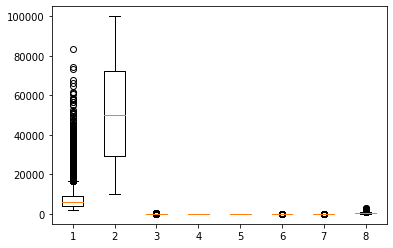

In [22]:
plt.boxplot(numerical)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6214b52b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6214ae0280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6214b52790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6214ae09a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6214ae0d30>],
 'means': []}

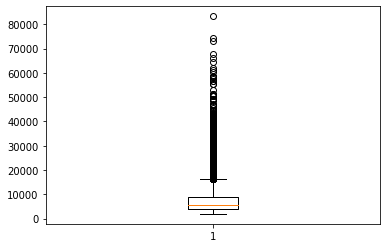

In [23]:
plt.boxplot(numerical['customer_lifetime_value']) #1

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6214abefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6214acc730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6214abec40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6214acce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6214ad8220>],
 'means': []}

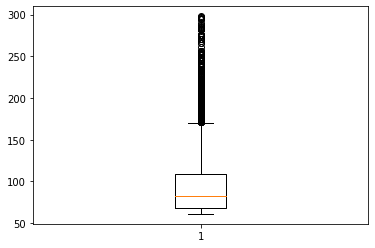

In [24]:
plt.boxplot(numerical['monthly_premium_auto']) #3

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6214a2d460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6214a2db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6214a2d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6214a382e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6214a38670>],
 'means': []}

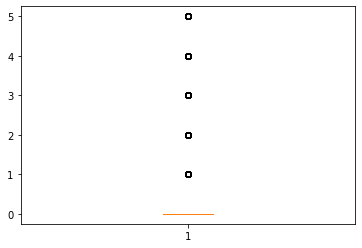

In [25]:
plt.boxplot(numerical['number_of_open_complaints']) #6

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6214a0da00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6214a1b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6214a0d670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6214a1b880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6214a1bc10>],
 'means': []}

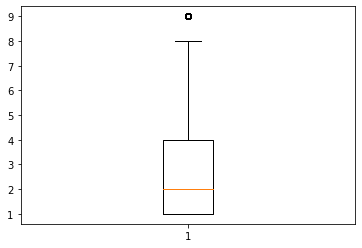

In [26]:
plt.boxplot(numerical['number_of_policies']) #7

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62149823d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6214982af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6214982040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f621498c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f621498c5e0>],
 'means': []}

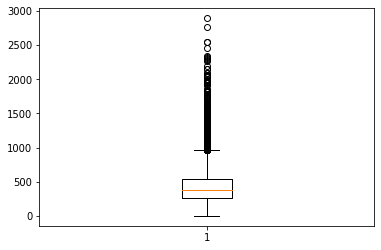

In [27]:
plt.boxplot(numerical['total_claim_amount']) #8

In [28]:
#I decide to remove outliers on columns 1,3,8, where there are a lot

In [29]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [30]:
numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])
numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])
numerical['total_claim_amount'] = remove_outliers(numerical['total_claim_amount'])

<ipython-input-30-832a2db24056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['customer_lifetime_value'] = remove_outliers(numerical['customer_lifetime_value'])
<ipython-input-30-832a2db24056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['monthly_premium_auto'] = remove_outliers(numerical['monthly_premium_auto'])
<ipython-input-30-832a2db24056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [31]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,0,9,292.0
1,2228.0,26794,64.0,3,26,0,1,744.0
2,14947.0,22139,100.0,34,31,0,2,480.0
3,NaN,49078,97.0,10,3,0,2,484.0
4,9025.0,23675,117.0,15,31,1,7,707.0
...,...,...,...,...,...,...,...,...
10684,15563.0,64811,NaN,8,40,2,7,NaN
10685,5259.0,61146,65.0,7,68,0,6,273.0
10686,NaN,39837,NaN,11,63,0,2,381.0
10687,11971.0,64195,158.0,0,27,4,6,618.0


In [32]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          8.99
income                           0.00
monthly_premium_auto             4.74
months_since_last_claim          0.00
months_since_policy_inception    0.00
number_of_open_complaints        0.00
number_of_policies               0.00
total_claim_amount               5.01
dtype: float64

In [33]:
#As we have removed some outliers, now we have some NaN

In [34]:
#replace Nan with mean values

In [35]:
numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
numerical["total_claim_amount"] = numerical["total_claim_amount"].fillna(numerical["total_claim_amount"].mean())

<ipython-input-35-61d6df3dcdb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["customer_lifetime_value"] = numerical["customer_lifetime_value"].fillna(numerical["customer_lifetime_value"].mean())
<ipython-input-35-61d6df3dcdb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["monthly_premium_auto"] = numerical["monthly_premium_auto"].fillna(numerical["monthly_premium_auto"].mean())
<ipython-input-35-61d6df3dcdb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [36]:
round(numerical.isna().sum()/len(numerical),4)*100 

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [37]:
#We don't have more NaNs!

### check if there are highly correlated features and drop them if there are any.

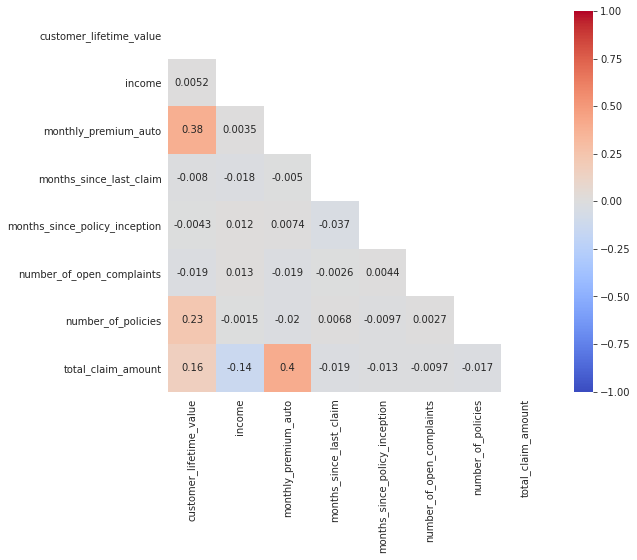

In [38]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [39]:
## Should I concatenate categorical and numerical or work with original df?

In [40]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.000000,48029,61.00000,7,52,0,9,292.00000
1,2228.000000,26794,64.00000,3,26,0,1,744.00000
2,14947.000000,22139,100.00000,34,31,0,2,480.00000
3,6279.879934,49078,97.00000,10,3,0,2,484.00000
4,9025.000000,23675,117.00000,15,31,1,7,707.00000
...,...,...,...,...,...,...,...,...
10684,15563.000000,64811,87.54174,8,40,2,7,389.34246
10685,5259.000000,61146,65.00000,7,68,0,6,273.00000
10686,6279.879934,39837,87.54174,11,63,0,2,381.00000
10687,11971.000000,64195,158.00000,0,27,4,6,618.00000


In [41]:
categoricals

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [42]:
df = pd.concat([numerical, categoricals], axis=1)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809.000000,48029,61.00000,7,52,0,9,292.00000,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2228.000000,26794,64.00000,3,26,0,1,744.00000,0,1,...,0,1,0,1,0,0,0,0,0,0
2,14947.000000,22139,100.00000,34,31,0,2,480.00000,0,2,...,1,0,0,1,0,0,0,0,1,0
3,6279.879934,49078,97.00000,10,3,0,2,484.00000,1,1,...,0,0,1,0,0,0,0,0,0,0
4,9025.000000,23675,117.00000,15,31,1,7,707.00000,2,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563.000000,64811,87.54174,8,40,2,7,389.34246,2,2,...,1,0,0,0,1,1,0,0,0,0
10685,5259.000000,61146,65.00000,7,68,0,6,273.00000,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,6279.879934,39837,87.54174,11,63,0,2,381.00000,1,2,...,0,0,0,0,1,0,1,0,0,0
10687,11971.000000,64195,158.00000,0,27,4,6,618.00000,2,1,...,0,0,1,0,0,0,0,0,1,0


In [43]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

<b>Data Splitting

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)